In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
sale_prediction_data=pd.read_csv("Advertising.csv")

In [6]:
sale_prediction_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
sale_prediction_data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [9]:
sale_prediction_data['Sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [11]:
filter=sale_prediction_data['Sales']=='TV'
len(sale_prediction_data[~filter])

200

In [12]:
sale_prediction_data=sale_prediction_data[~filter]

In [13]:
sale_prediction_data.shape

(200, 5)

In [15]:
sale_prediction_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
sale_prediction_data['Sales']=sale_prediction_data['Sales'].astype(int)

In [17]:
sale_prediction_data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales           int64
dtype: object

In [18]:
sale_prediction_data['Sales']=sale_prediction_data['Sales'].astype(float)

In [19]:
sale_prediction_data['Radio']=sale_prediction_data['Radio'].astype(int)

In [20]:
sale_prediction_data['sale']=sale_prediction_data['Sales']*sale_prediction_data['Radio']
sale_prediction_data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales,sale
0,1,230.1,37,69.2,22.0,814.0
1,2,44.5,39,45.1,10.0,390.0
2,3,17.2,45,69.3,9.0,405.0
3,4,151.5,41,58.5,18.0,738.0
4,5,180.8,10,58.4,12.0,120.0


In [21]:
sale_prediction_data.groupby('Sales')['sale'].sum()

Sales
1.0       39.0
3.0       33.0
4.0        8.0
5.0      515.0
6.0      402.0
7.0      980.0
8.0     1288.0
9.0     2115.0
10.0    2840.0
11.0    2882.0
12.0    2808.0
13.0    2002.0
14.0    4340.0
15.0    4770.0
16.0    2816.0
17.0    4233.0
18.0    4662.0
19.0    6042.0
20.0    4460.0
21.0    4032.0
22.0    5478.0
23.0    4025.0
24.0    3120.0
25.0    4400.0
26.0    1118.0
27.0    1296.0
Name: sale, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

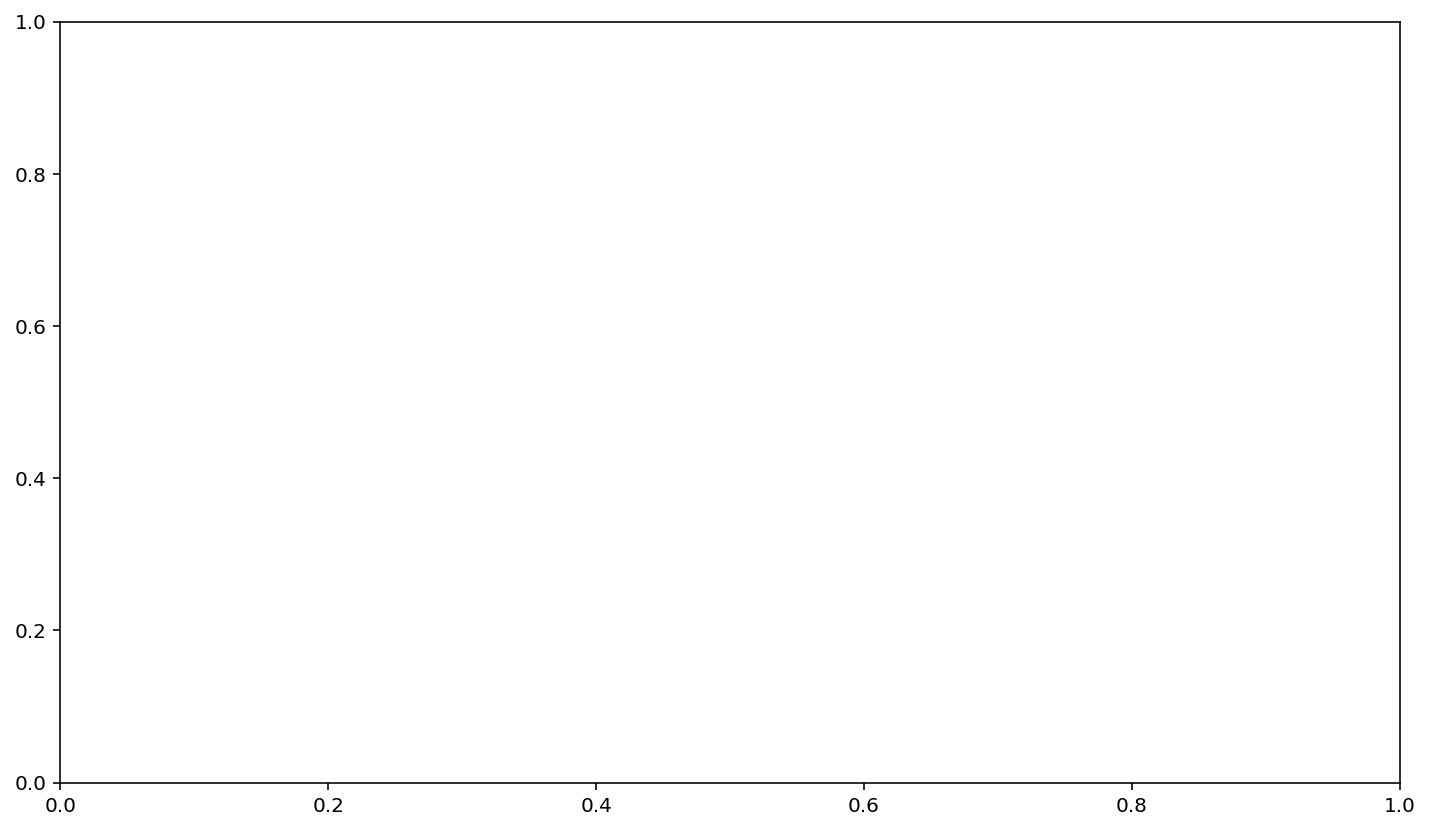

In [25]:
a=range(1,13)
plt.bar(a,sale_prediction_data.groupby('Sales')['sale'].sum())
plt.xticks(a)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Sale number')
plt.show()

In [26]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [29]:
def city(x):
    return x.split(',')[1]

In [28]:
sale_prediction_data['city']=sale_prediction_data['Newspaper'].apply(city)

AttributeError: 'float' object has no attribute 'split'

In [30]:
sale_prediction_data.groupby('city')['city'].count()

KeyError: 'city'

In [33]:
sale_prediction_data.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales', 'sale']

In [34]:

sale_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    int64  
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
 5   sale        200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.9 KB


In [35]:
sale_prediction_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales,sale
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,22.79000,30.554000,13.540000,353.520000
std,57.879185,85.854236,14.82582,21.778621,5.253226,316.877383
min,1.000000,0.700000,0.00000,0.300000,1.000000,0.000000
25%,50.750000,74.375000,9.75000,12.750000,10.000000,90.000000
50%,100.500000,149.750000,22.50000,25.750000,12.000000,252.000000
75%,150.250000,218.825000,36.00000,45.100000,17.000000,545.000000
max,200.000000,296.400000,49.00000,114.000000,27.000000,1296.000000


In [36]:
sale_prediction_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
sale          0
dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

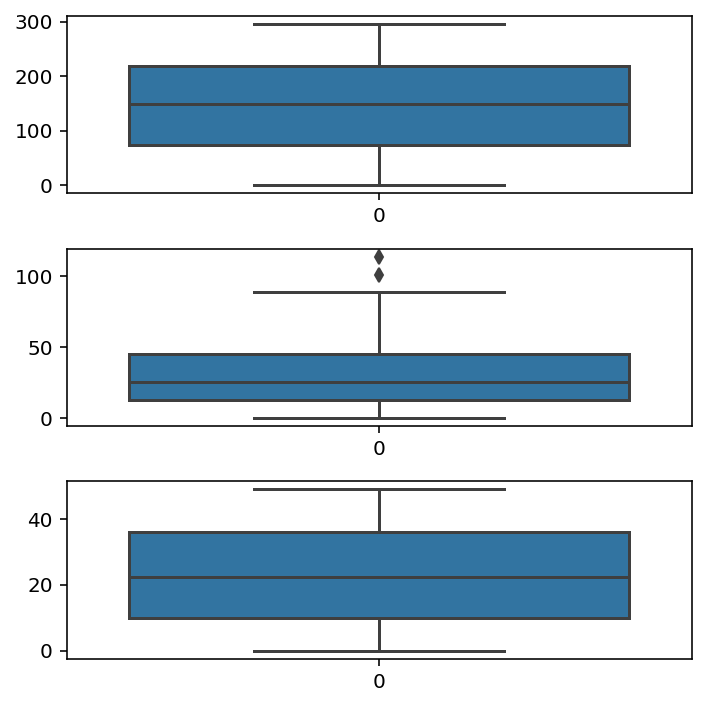

In [39]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sale_prediction_data['TV'], ax = axs[0])
plt2 = sns.boxplot(sale_prediction_data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sale_prediction_data['Radio'], ax = axs[2])
plt.tight_layout()
     

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

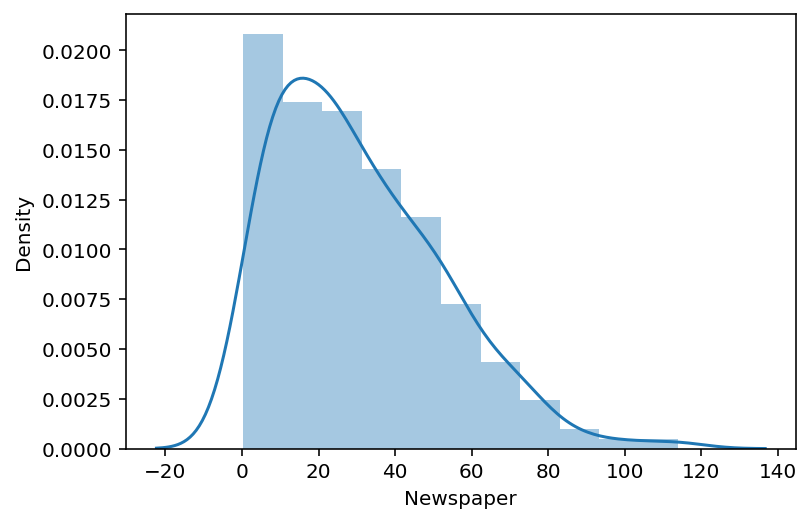

In [41]:

sns.distplot(sale_prediction_data['Newspaper'])


In [42]:

iqr = sale_prediction_data.Newspaper.quantile(0.75) - sale_prediction_data.Newspaper.quantile(0.25)

In [43]:
lower_bridge = sale_prediction_data["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = sale_prediction_data["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


<AxesSubplot: >

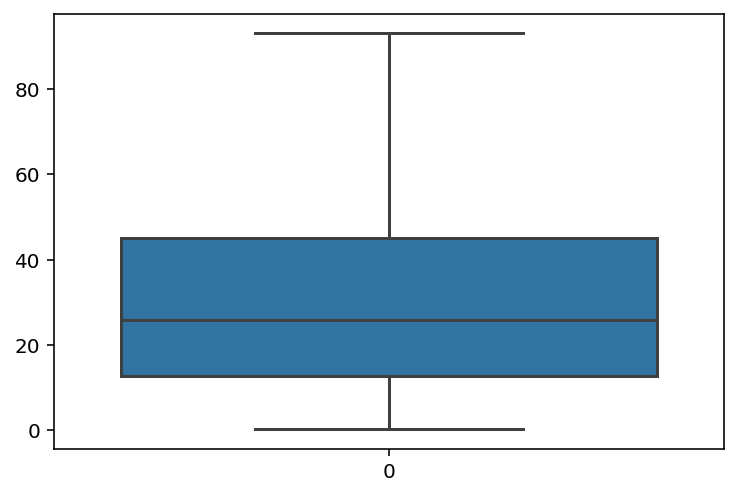

In [44]:
data =sale_prediction_data.copy()

data.loc[data['Newspaper']>=93, 'Newspaper']=93
sns.boxplot(data['Newspaper'])

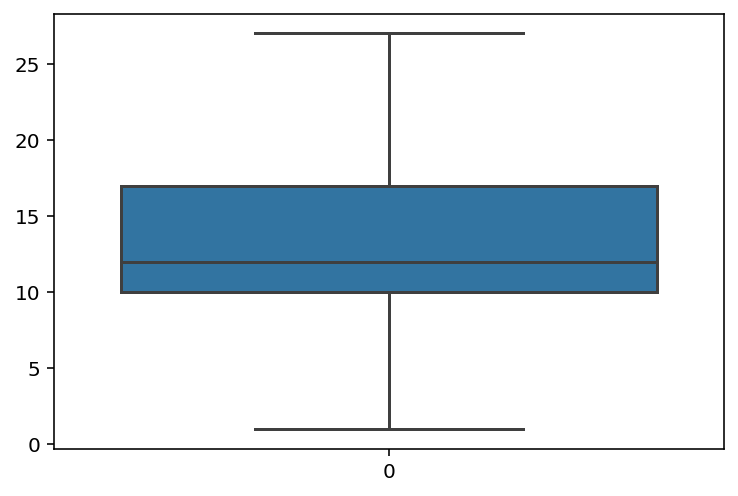

In [46]:
sns.boxplot(data['Sales']);

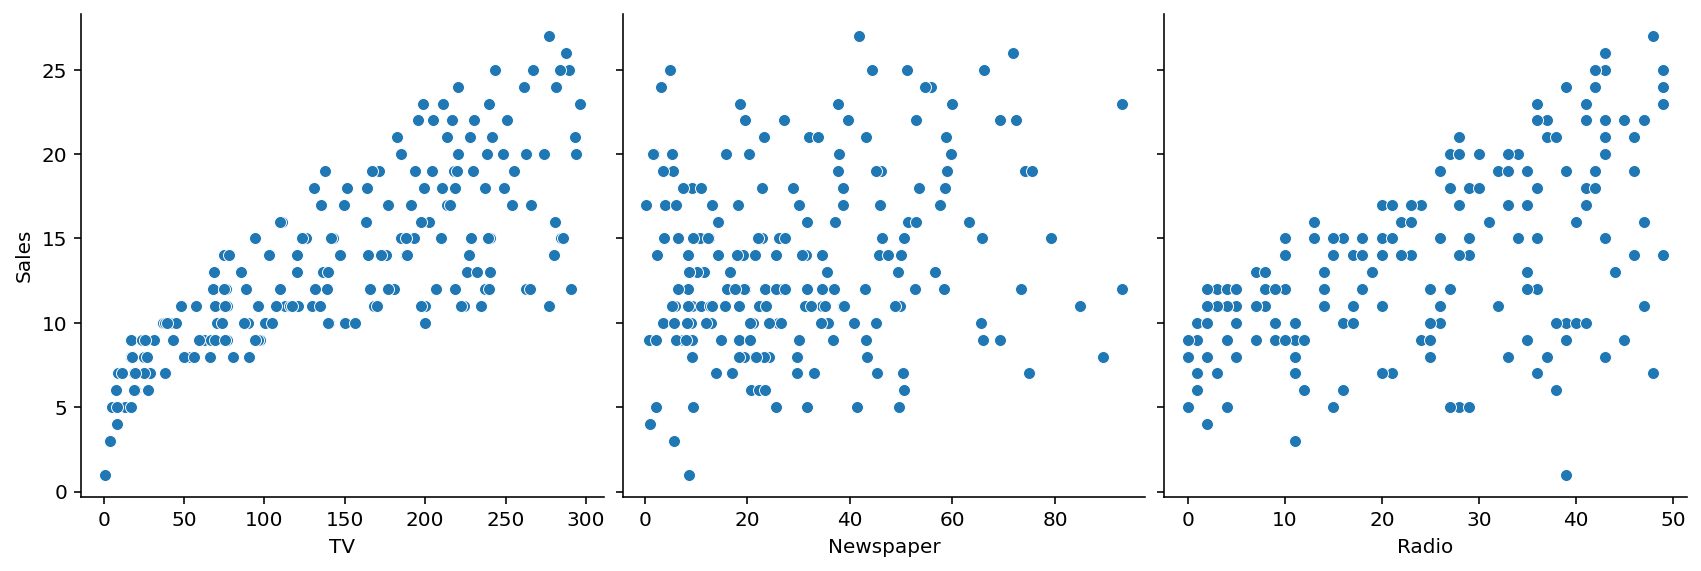

In [47]:

sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

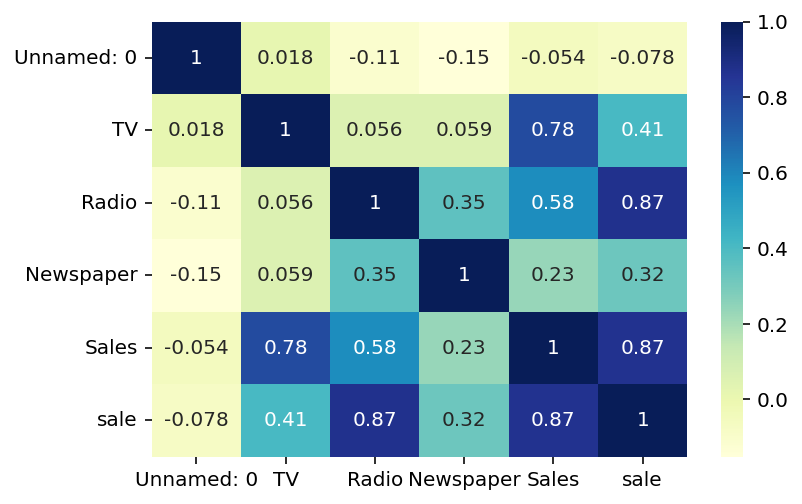

In [48]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [51]:
important_features = list(sale_prediction_data.corr()['Sales'][(sale_prediction_data.corr()['Sales']>+0.5)|(sale_prediction_data.corr()['Sales']<-0.5)].index)

In [53]:

print(important_features)

['TV', 'Radio', 'Sales', 'sale']


In [54]:

X = data['TV']
y = data['Sales']

In [58]:

X = X.values.reshape(-1,1)
     


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [59]:
X

     

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [60]:
y
     

0      22.0
1      10.0
2       9.0
3      18.0
4      12.0
       ... 
195     7.0
196     9.0
197    12.0
198    25.0
199    13.0
Name: Sales, Length: 200, dtype: float64

In [61]:
print(X.shape,y.shape)

(200, 1) (200,)


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [63]:

print(X_train.shape,y_train.shape)
     

(134, 1) (134,)


In [64]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [66]:
knn_train_pred = knn.predict(X_train)

In [67]:
knn_test_pred = knn.predict(X_test)

In [68]:
print(knn_train_pred, knn_test_pred)

[13.2 17.  15.  18.  17.  18.2  9.4 16.8 15.6 17.2 16.  10.4  5.4 15.6
 18.2 13.6 15.6 14.2 11.   4.6 13.6 16.6 16.  16.  16.   7.2  9.6 14.
 17.6 19.4 18.2  6.4  7.2 10.6 11.  19.6 10.6 14.8 10.8 21.4  9.4 14.
 15.6  4.   6.4 18.6 18.8 10.6 19.8 14.4 11.  11.  16.8 16.6 17.8 15.6
  7.2 14.  21.8 13.8  9.6 18.2 14.4  6.4 13.6 19.4 19.6 13.2 16.  19.6
 16.8 18.2 21.4 14.4 19.6 14.8 11.   5.4  4.  13.8 14.8 19.4  9.  10.6
 19.  13.8 13.2 19.4 10.8 14.  13.2 10.6 19.8  9.  11.2 14.4  5.4 17.
 10.4  9.  10.4 15.8 17.6  6.4  9.2 14.  11.  17.6 14.4  9.2 14.4 18.
 15.8 14.4 10.4 19.8 17.6  9.6  9.   7.2 14.  13.6  9.4 10.6  5.4 11.
 15.6 20.  18.2 15.6  9.4 10.6 10.6 13. ] [14.  16.4 13.6 16.  18.   9.4 13.8 10.8 20.  14.2 14.  19.  19.2 13.
  9.6  6.4 19.  14.8 13.  19.2  5.8  7.2 13.2 21.4  6.4  6.4 11.  18.2
 14.4 16.8 14.  11.   9.6 19.8  9.4  6.  18.6  7.4 17.6 13.2 13.6  7.2
 10.  16.6 14.  17.  15.4 16.   7.2 17.8 14.8 14.4  6.4  5.4 14.4  8.4
 19.8 18.4 13.6 20.  11.  17.6  5.8 18.2 

In [69]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [70]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5070023366247081
RMSE: 3.4658507198264052


In [71]:

Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.69,0.507002,3.465851,0.182997


In [72]:

svr = SVR().fit(X_train,y_train)
svr

SVR()

In [73]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [74]:
print(svr_train_pred,svr_test_pred)

[11.7094971  15.10193959 16.83276833 15.87029885 15.22384863 16.71904402
  8.40344899 15.97502204 17.12888057 16.0995159  14.80305551  9.89952818
  6.78195605 17.12699746 16.61728224 13.49749872 17.12361598 12.7272866
 10.00838642  6.74294931 11.96968087 16.48134995 16.17098938 16.75876444
 16.77940875  7.2302187   8.1960112  14.49940855 17.11510707 15.67838794
 16.29155898  6.967656    7.23411231 11.10047797 10.65523904 15.76294835
 10.99027428 16.97264366 10.28243828 15.890382    8.10590819 14.14335175
 17.12763731  6.73191215  7.01155983 16.71591506 16.29446109  9.51815883
 16.15556415 12.94218974  9.65449567  9.60722513 16.21038839 16.4981461
 16.4490102  15.37613705  7.3312554  14.56308031 17.12477154 12.59263506
 11.29581388 16.66444672 12.93782887  6.95927034 13.41716145 17.13707981
 16.87941664 12.14290947 15.40739087 16.91767416 15.9420043  16.65117148
 16.0308301  12.76552754 16.90891127 12.88138421  9.99699184  6.77902847
  6.71629976 12.52181035 16.9961633  17.14195339  9.0

In [75]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5479981278793111
RMSE: 3.318620100409979


In [76]:

Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.690000,0.507002,3.465851,0.182997
1,Support Vector Machine,0.574689,0.547998,3.318620,0.026691


In [77]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)   
model = sm.OLS(y_train, X_train_constant).fit()

model.params

const    6.393120
x1       0.049262
dtype: float64

In [78]:
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     207.1
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           8.06e-29
Time:                        10:58:16   Log-Likelihood:                -352.35
No. Observations:                 134   AIC:                             708.7
Df Residuals:                     132   BIC:                             714.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3931      0.585     10.929      0.0

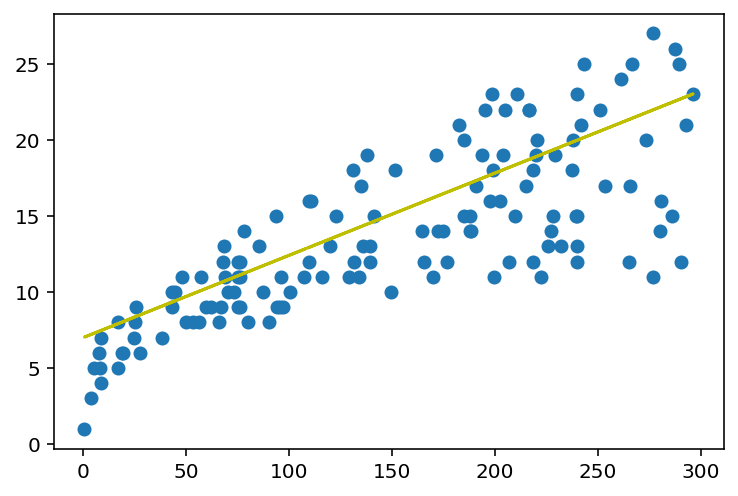

In [79]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [80]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

71     0.197922
53     5.611654
100   -6.348970
152   -0.127274
97    -0.501648
         ...   
27    -3.220906
138    0.488617
16     2.266922
34    -2.107485
94    -0.683850
Name: Sales, Length: 134, dtype: float64

In [81]:
y_train_pred

array([11.80207838, 15.38834572, 17.3489699 , 16.12727443, 15.50164812,
       17.15684843,  8.77247066, 16.23565064, 18.22090578, 16.36865781,
       15.112479  , 10.0089447 ,  6.81677267, 18.2061272 , 17.0041365 ,
       13.85630019, 18.18149625, 13.00899527, 10.10254234,  6.65913455,
       12.10750224, 20.22093949, 16.44747687, 17.22088892, 17.25537226,
        7.62466806,  8.59512777, 14.83168609, 18.12730814, 15.93515296,
       16.58541023,  7.24042514,  7.62959426, 11.13211634, 10.68875912,
       16.01889822, 11.01881394, 17.63961519, 10.34392572, 20.99435154,
        8.51630871, 14.49670507, 18.21105339,  6.59509406,  7.31431801,
       17.15192224, 20.48202763,  9.68874226, 20.66429671, 13.25530484,
        9.80204467,  9.76263513, 16.49181259, 20.19630853, 16.7775317 ,
       15.64450767,  7.74782285, 14.89080039, 18.75293445, 12.85135715,
       11.33901638, 17.07310318, 13.25037865,  7.22564656, 13.77255494,
       18.29972484, 19.54112507, 12.31440228, 15.67406482, 19.45

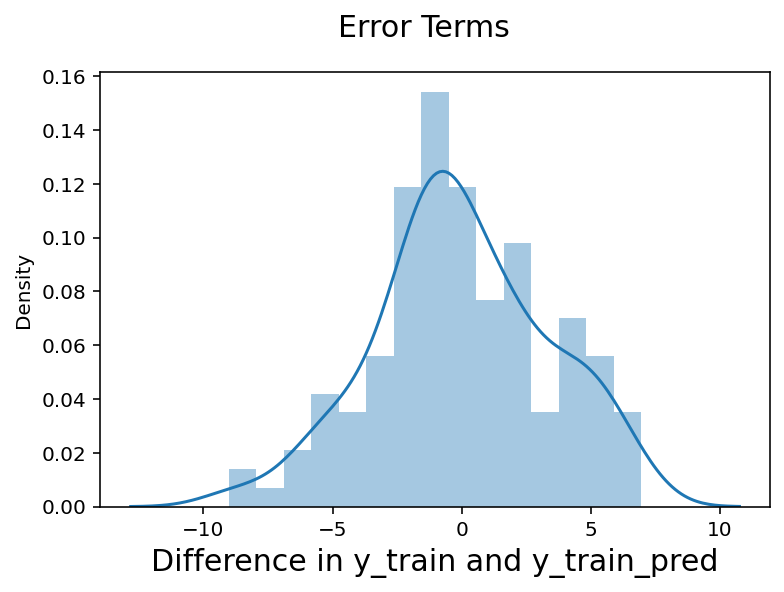

In [82]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

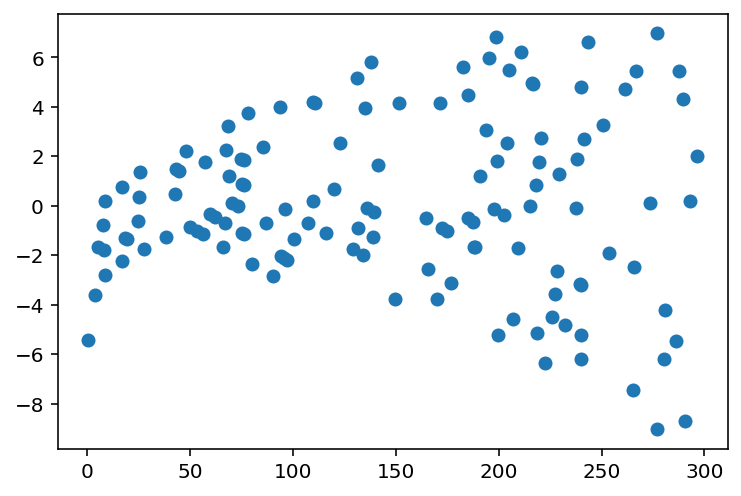

In [83]:
plt.scatter(X_train, res)
plt.show()

In [84]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
     

In [85]:

y_pred

array([14.61000748, 15.29967427, 13.76762875, 17.24551988, 16.12727443,
        8.26507295, 12.58534281, 10.07298519, 18.64948443, 12.16661654,
       14.44744316, 19.33422503, 20.39828238, 14.10753595,  8.58527539,
        7.27490847, 19.34407742, 17.72828664, 11.54591642, 20.36379904,
        7.04337748,  7.56555377, 11.95479031, 20.85641818,  7.24042514,
        7.3192442 ,  9.79219228, 16.58048404, 13.26515722, 16.23565064,
       14.43759078, 10.74294722, 11.19615683, 16.91053886,  8.33896582,
        6.96948461, 17.1174389 ,  7.94487051, 15.91052201, 12.32918086,
       12.35381181,  7.80201096, 11.45231879, 20.25542283, 14.68882654,
       17.94503906, 17.42778896, 15.112479  ,  7.71333951, 16.7726055 ,
       17.62483662, 13.43264773,  7.35865373,  6.75273219, 13.30456675,
        8.21088484, 16.90561267, 18.97461306, 13.64940015, 18.62977966,
       10.8119139 , 18.08789861,  7.03845129, 16.96965316, 15.04843851,
       17.3489699 ])

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.1690640724547805

In [88]:

r2 = r2_score(y_test, y_pred)
r2

0.5878197344234761

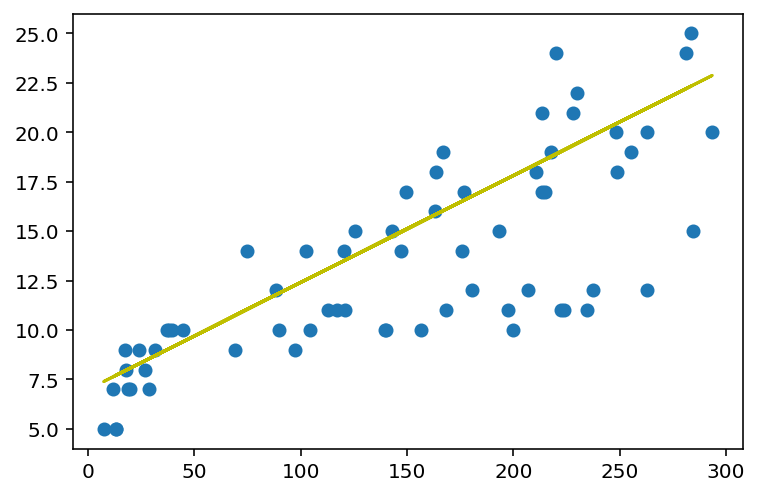

In [89]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()